In [162]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
import os

# setup the default file lookup location to cwd
__location__ = os.path.realpath(os.path.join(os.getcwd(), os.path.abspath('')))

df = pd.read_csv(__location__ + "/data.csv")
df_meta = pd.DataFrame(df['Degree'].value_counts()).reset_index()
df_meta.columns = ['Degree','Percent']

# add additional columns
df_meta['Male'] = 0
df_meta['Female'] = 0

In [163]:
# preparing metadata
for idx in df_meta.index:
    # df_meta['Degree'] = str(idx)
    filtr = str(df_meta.Degree[idx])
    temp_df = df.loc[df.Degree == filtr]
    
    df_meta.Male[idx] = temp_df.Gender.value_counts()[0]
    df_meta.Female[idx] = temp_df.Gender.value_counts()[1]

In [164]:
# checking the metadata output 
# this is the data we will be using to plot the graphs
df_meta

,Degree,Percent,Male,Female
0,B-MI,43,22,21
1,B-DMT,40,21,19
2,B-ARCH,17,14,3


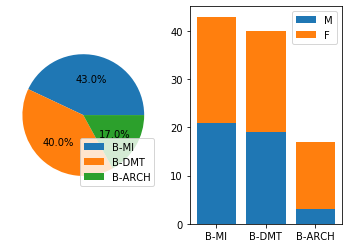

In [165]:
# start with the plotting
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.pie('Percent', autopct='%1.1f%%', data=df_meta)
p1 = ax2.bar('Degree', 'Female', data=df_meta)
p2 = ax2.bar('Degree', 'Male', bottom='Female', data=df_meta)

ax1.legend(labels=df_meta['Degree'], loc="lower right")
ax2.legend(labels=['M','F'], loc="upper right")